# Experimento 1: Modelo KNN

```python
# Importando as dependências necessárias

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Dataset

```python
# Leitura do dataset, já pré-processado e normalizado

In [2]:
train_data = pd.read_csv('./data/train_normalized_dataset.csv')
test_data = pd.read_csv('./data/test_normalized_dataset.csv')

In [3]:
train_data.head(10)

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,0.261743
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,0.228380
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,0.285777
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,0.581431
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,0.143584
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,False,rssi_1_1,0.528973
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,False,rssi_1_1,0.776637
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,True,rssi_1_1,0.370544
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,True,rssi_1_1,0.013828
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,True,rssi_1_1,0.324846


In [4]:
test_data.head(10)

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,rssi_1_1,0.0
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,rssi_1_1,0.0
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,rssi_1_1,0.0
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,rssi_1_1,0.0
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,rssi_1_1,0.0
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,rssi_1_1,0.0
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,rssi_1_1,0.0
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,rssi_1_1,0.0
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,rssi_1_1,0.0
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,rssi_1_1,0.0


# Treinamento do modelo
```python
# Separando as colunas numéricas do modelo

In [5]:
numeric_features = ['grupo',  'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3','lat_y', 'lon_y', 'rssi_value']
numeric_data = train_data.copy()
numeric_data = numeric_data[numeric_features]

numeric_data.head(10)

,grupo,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,rssi_value
0,1,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,0.261743
1,1,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,0.228380
2,1,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,0.285777
3,1,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,0.581431
4,1,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,0.143584
5,1,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,0.528973
6,1,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,0.776637
7,1,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,0.370544
8,1,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,0.013828
9,1,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,0.324846


In [6]:
X_train = numeric_data.drop(columns=['lat_y', 'lon_y', 'ponto_id'])
y_train = numeric_data[['lat_y', 'lon_y']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
}

# Chamando o função do Random Forest
random_forest = RandomForestRegressor()

# Grid search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit do modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   6.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   9.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   9.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   9.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   9.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   9.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=400; total time=  12.5s
[CV] END max_depth=10, min_samples_split=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [8]:
melhor_modelo = grid_search.best_estimator_
predictions = melhor_modelo.predict(X_val)
predictions

array([[ -8.05568084, -34.95133172],
       [ -8.055494  , -34.951316  ],
       [ -8.055786  , -34.951505  ],
       ...,
       [ -8.05575503, -34.95134568],
       [ -8.055506  , -34.951693  ],
       [ -8.04998187, -34.95472509]])

# Resultados

In [9]:
def haversine_distance(y_true, y_pred):
    lat1, lon1 = y_pred[:, 0], y_pred[:, 1]
    lat2, lon2 = y_true[:, 0], y_true[:, 1]

    # Converte latitudes e longitudes de graus para radianos
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Raio da Terra em metros: 6,371,000
    radius = 6371000

    distance = radius * c
    return distance

In [10]:
distances = haversine_distance(y_val.values, predictions)

# Erro máximo e mínimo na distância euclidiana
min_distance_error = np.min(distances)
mean_distance_error = np.mean(distances)
max_distance_error = np.max(distances)
std_distance_error = np.std(distances)

print(f'Erro mínimo na distância(em metros): {min_distance_error}')
print(f'Erro médio na distância(em metros): {mean_distance_error}')
print(f'Erro máximo na distância(em metros): {max_distance_error}')
print(f'Desvio padrão do erro na distância(em metros): {std_distance_error}')

Erro mínimo na distância(em metros): 1.4146461779773745e-09
Erro médio na distância(em metros): 13.730352683107908
Erro máximo na distância(em metros): 257.360843072137
Desvio padrão do erro na distância(em metros): 25.858387868888535


In [11]:
mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)

accuracy = melhor_modelo.score(X_val, y_val)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'Accuracy: {accuracy}')

MAE: 7.822344436864134e-05
MSE: 3.4972078869761934e-08
Accuracy: 0.9934179270324579


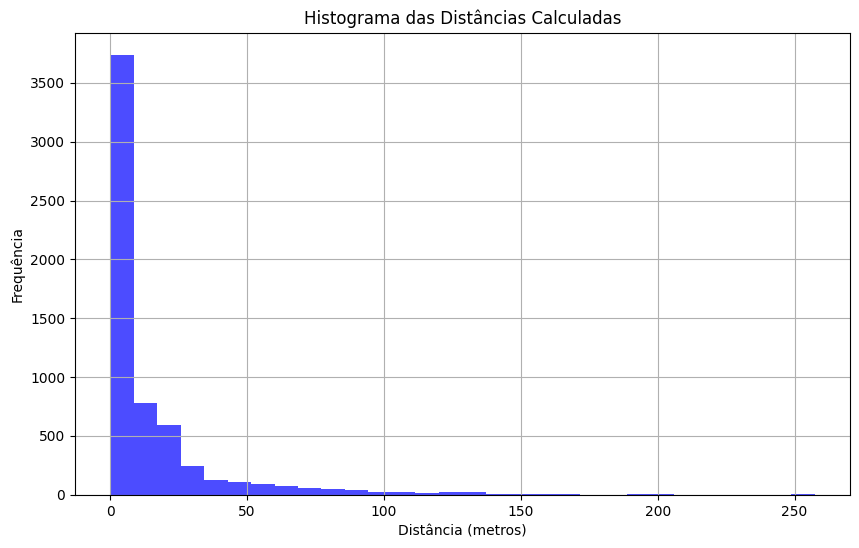

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='blue', alpha=0.7)
plt.title('Histograma das Distâncias Calculadas')
plt.xlabel('Distância (metros)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

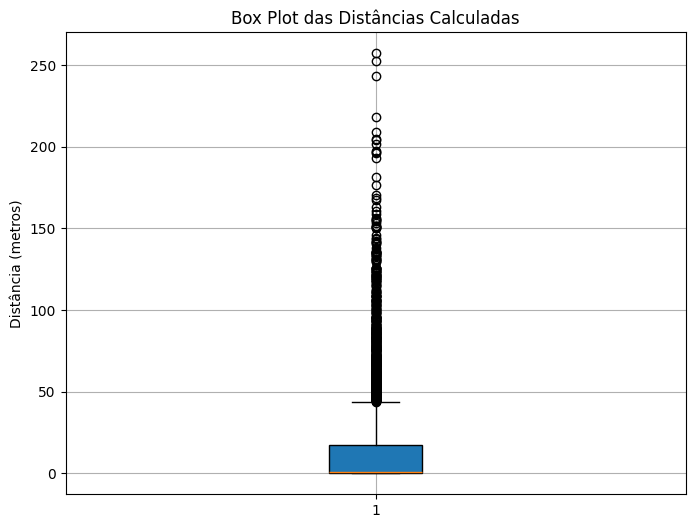

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(distances, vert=True, patch_artist=True)
plt.title('Box Plot das Distâncias Calculadas')
plt.ylabel('Distância (metros)')
plt.grid(True)
plt.show()

# Visualização do mapa

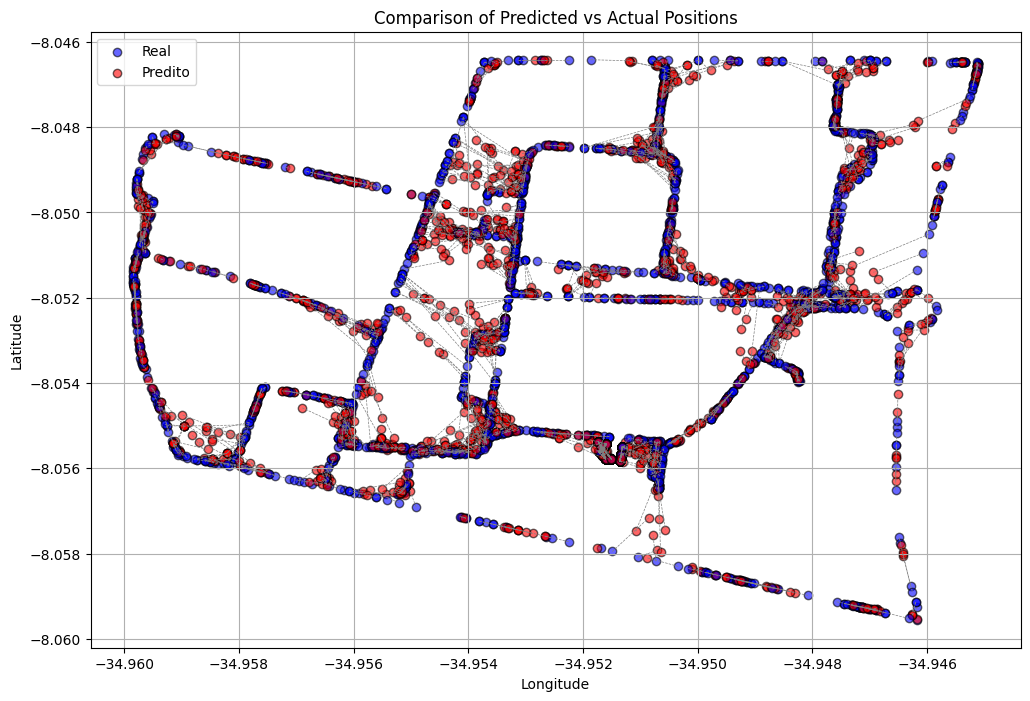

In [14]:
def plot_comparison_map(y_true, y_pred):
    # Configurar a figura e o eixo
    fig, ax = plt.subplots(figsize=(12, 8))

    # Desenhar cada par de pontos reais e preditos
    for real, pred in zip(y_true, y_pred):
        # Pontos reais em azul
        ax.scatter(real[1], real[0], color='blue', label='Real', alpha=0.6, edgecolor='black')
        # Pontos preditos em vermelho
        ax.scatter(pred[1], pred[0], color='red', label='Predito', alpha=0.6, edgecolor='black')
        # Linha entre real e predito
        ax.plot([real[1], pred[1]], [real[0], pred[0]], 'gray', linestyle='--', linewidth=0.5)

    # Configurações de exibição
    ax.set_title('Comparison of Predicted vs Actual Positions')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
    
    # Adicionar legendas apenas uma vez
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar o gráfico
    plt.show()

plot_comparison_map(y_val.values, predictions)

In [15]:
numeric_test_features = ['grupo', 'lat', 'lon', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3', 'rssi_value']
numeric_test_data = test_data.copy()
numeric_test_data = numeric_test_data[numeric_test_features]

numeric_test_data.head(10)

,grupo,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_value
0,1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,0.0
1,1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,0.0
2,1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,0.0
3,1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,0.0
4,1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,0.0
5,1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,0.0
6,1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,0.0
7,1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,0.0
8,1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,0.0
9,1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,0.0


In [17]:
import pandas as pd

# Supondo que você já tem seu modelo KNN carregado e pronto para fazer previsões
# Aqui também assumimos que numeric_test_data e test_data são DataFrames já definidos

ponto_ids = test_data['ponto_id'].tolist()

# Preparando os dados de teste
X_test = numeric_test_data.drop(columns=['lat', 'lon', 'ponto_id'])
y_test = numeric_test_data[['lat', 'lon']]

# Realizando as previsões
predictions = melhor_modelo.predict(X_test)

# Criando o DataFrame combinado com colunas separadas para latitude e longitude
submit_df = pd.DataFrame({
    'ponto_id': ponto_ids,
    'lat': predictions[:, 0],  # Latitude
    'lon': predictions[:, 1]   # Longitude
})

# Exportando para um arquivo CSV na pasta 'data'
submit_df.to_csv('data/Resultados_Equipe4_RF2.csv', index=False)
